In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Loading dataset
url = "https://raw.githubusercontent.com/manishvarkala/Team3/main/online_shoppers_intention.csv"
df = pd.read_csv(url)

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(df.describe)

<bound method NDFrame.describe of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0        

In [4]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
missing_values = df.isnull().sum()
missing_values


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:

correlation_matrix = df.corr()

# Correlation with Target variable "Revenue"
correlation_with_revenue = correlation_matrix['Revenue'].sort_values(ascending=False)


print(correlation_with_revenue)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


<ipython-input-7-86004b30aa86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<ipython-input-8-c0c2fc6edc0d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


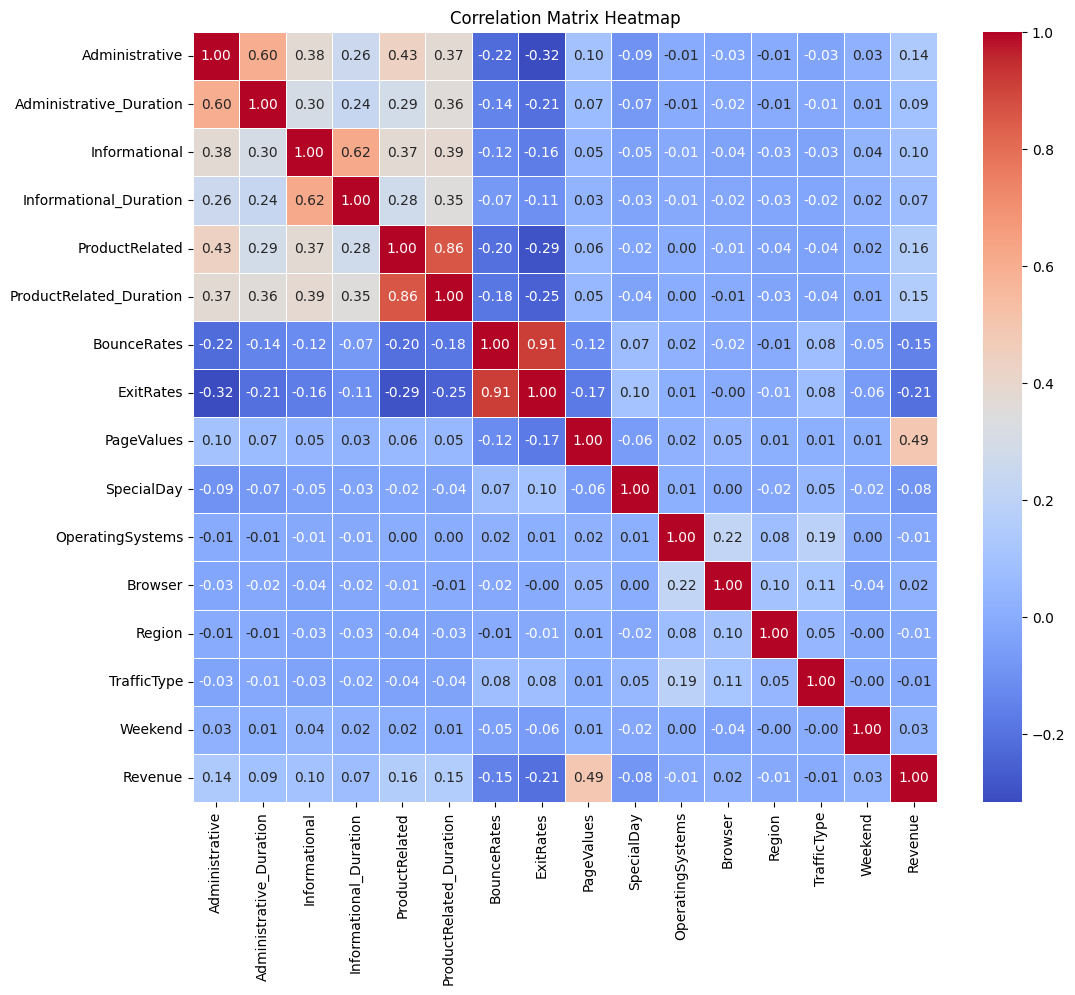

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

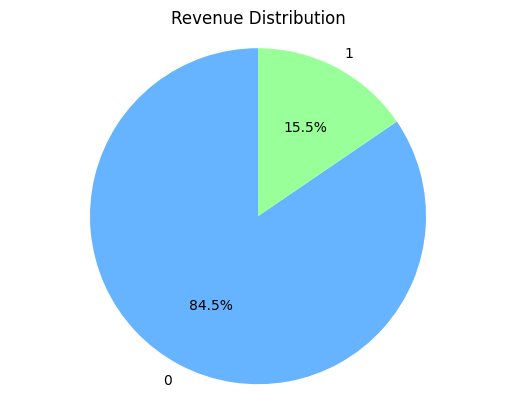

In [9]:
import matplotlib.pyplot as plt


purchase_counts = df['Revenue'].value_counts()

fig, ax = plt.subplots()
ax.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
ax.axis('equal')

plt.title('Revenue Distribution')

plt.show()


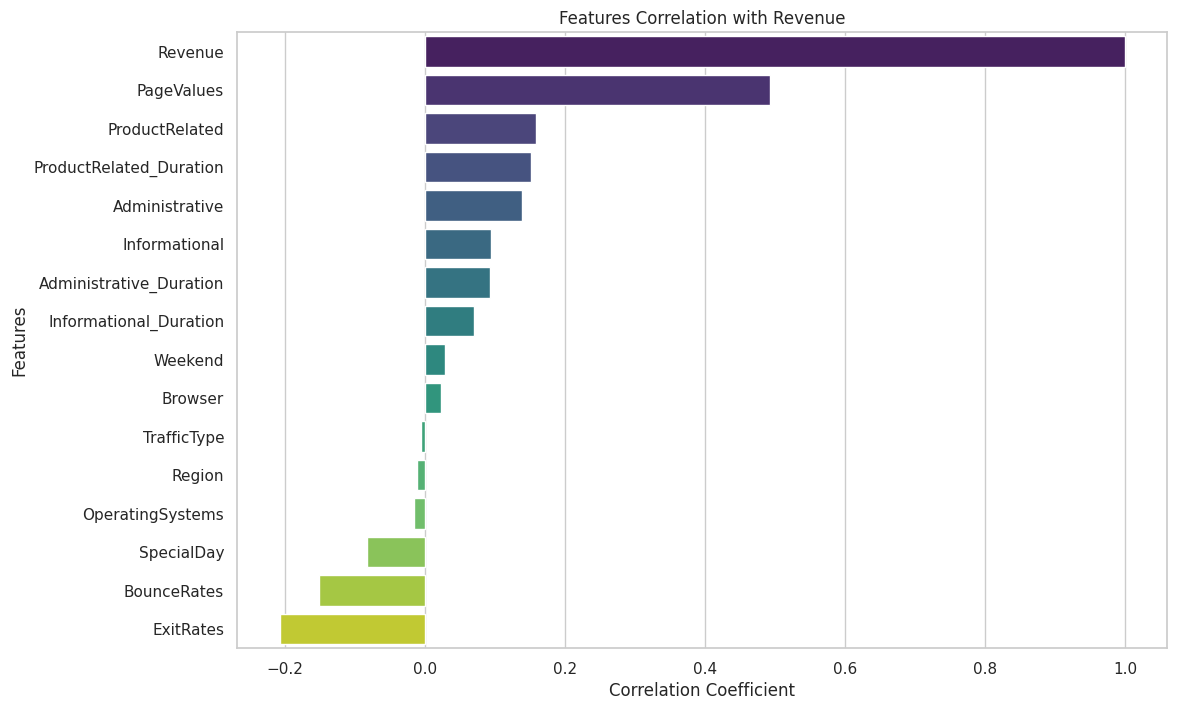

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette="viridis")
plt.title('Features Correlation with Revenue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


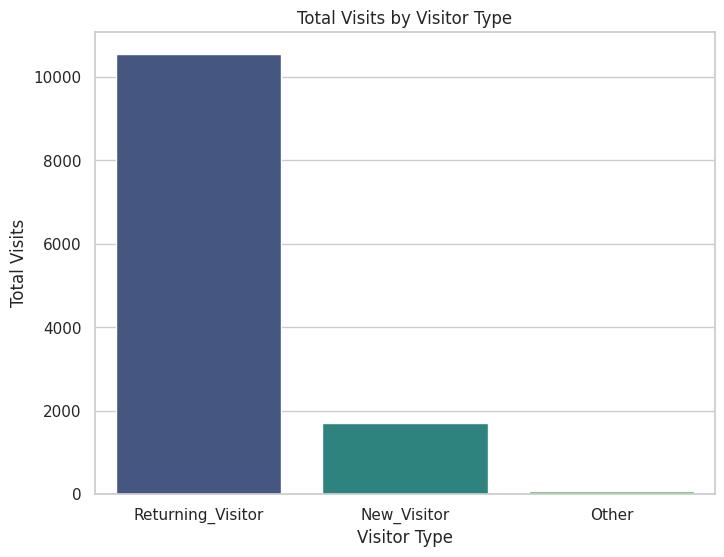

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for VisitorType
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='VisitorType', palette='viridis')
plt.xlabel('Visitor Type')
plt.ylabel('Total Visits')
plt.title('Total Visits by Visitor Type')

plt.show()


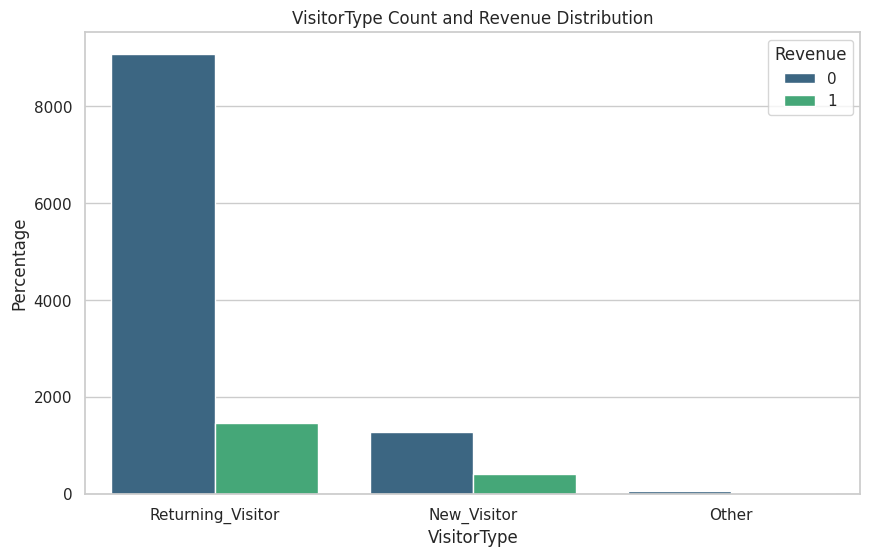

<ipython-input-12-a491628525a3>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='VisitorType', y='Revenue', data=df, ci=None, palette='viridis')


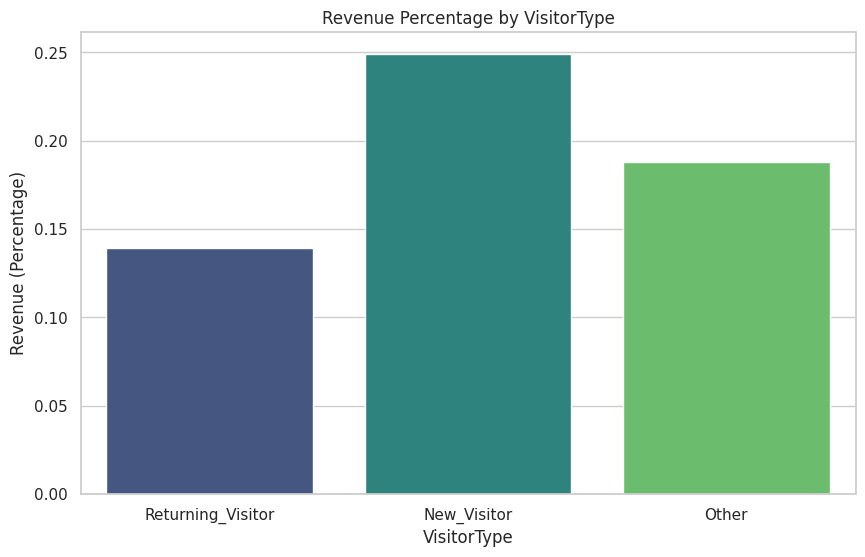

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', data=df, hue='Revenue', palette='viridis')
plt.title('VisitorType Count and Revenue Distribution')
plt.xlabel('VisitorType')
plt.ylabel('Percentage')
plt.show()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='VisitorType', y='Revenue', data=df, ci=None, palette='viridis')
plt.title('Revenue Percentage by VisitorType')
plt.xlabel('VisitorType')
plt.ylabel('Revenue (Percentage)')
plt.show()


webpage analysis

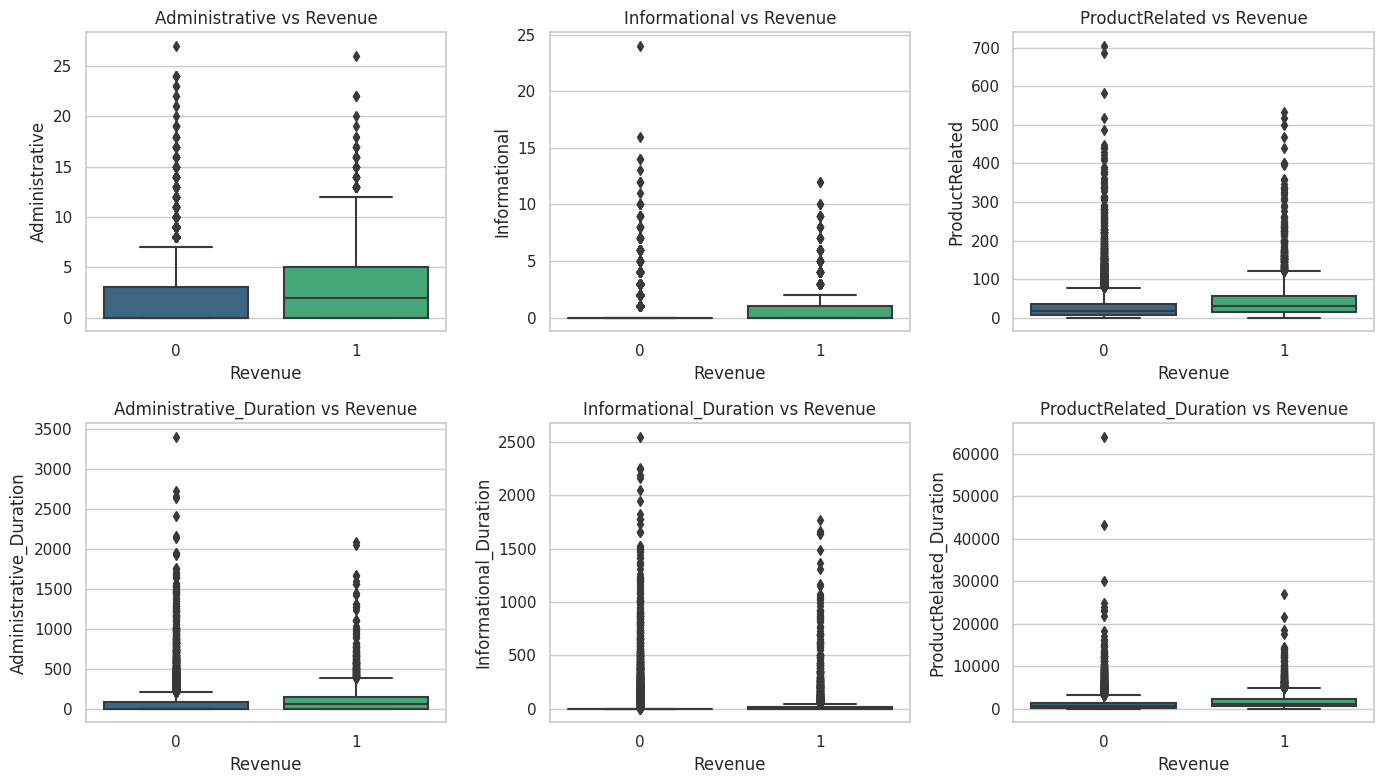

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Administrative', 'Informational', 'ProductRelated',
                     'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Revenue']

df_selected = df[selected_columns]

plt.figure(figsize=(14, 8))

for i, column in enumerate(['Administrative', 'Informational', 'ProductRelated',
                            'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Revenue', y=column, data=df_selected, palette='viridis')
    plt.title(f'{column} vs Revenue')

plt.tight_layout()
plt.show()


In General Visitors when they are not making purchase they tend to visit less pages and less time on the website

Visitors tend to spend more time on Product Related pages rather than informational pages

<Figure size 1000x800 with 0 Axes>

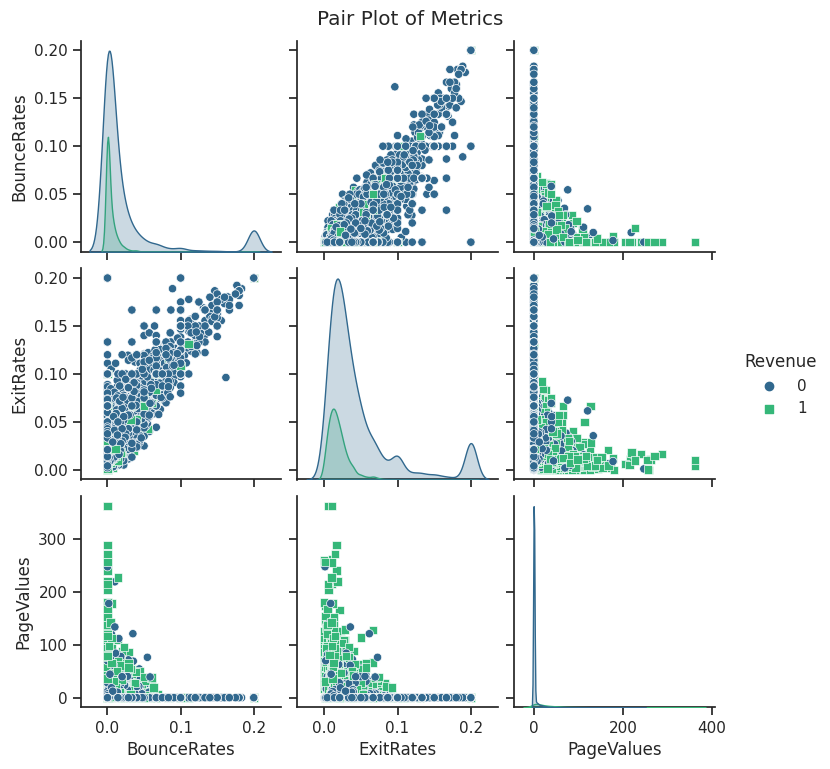

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#page metrics

selected_columns = ['BounceRates', 'ExitRates', 'PageValues']

selected_columns_with_target = selected_columns + ['Revenue']

df_selected_metrics = df[selected_columns_with_target]

sns.set(style="ticks")
plt.figure(figsize=(10, 8))

#pairplot
g = sns.pairplot(df_selected_metrics, hue='Revenue', palette='viridis', markers=["o", "s"])

g.fig.suptitle('Pair Plot of Metrics', y=1.02)

plt.show()


All 3 Distributions are skewed right & distributions have a lot of outliers, observations are :

Bounce rates and exit rates are positively correlated. This means that visitors who bounce from a website are more likely to also exit the website.

Page values and exit rates are negatively correlated. This means that visitors who spend more time on a website are less likely to exit the website.

Visitors who generate higher revenue are less likely to bounce from the website and more likely to spend more time on the website.

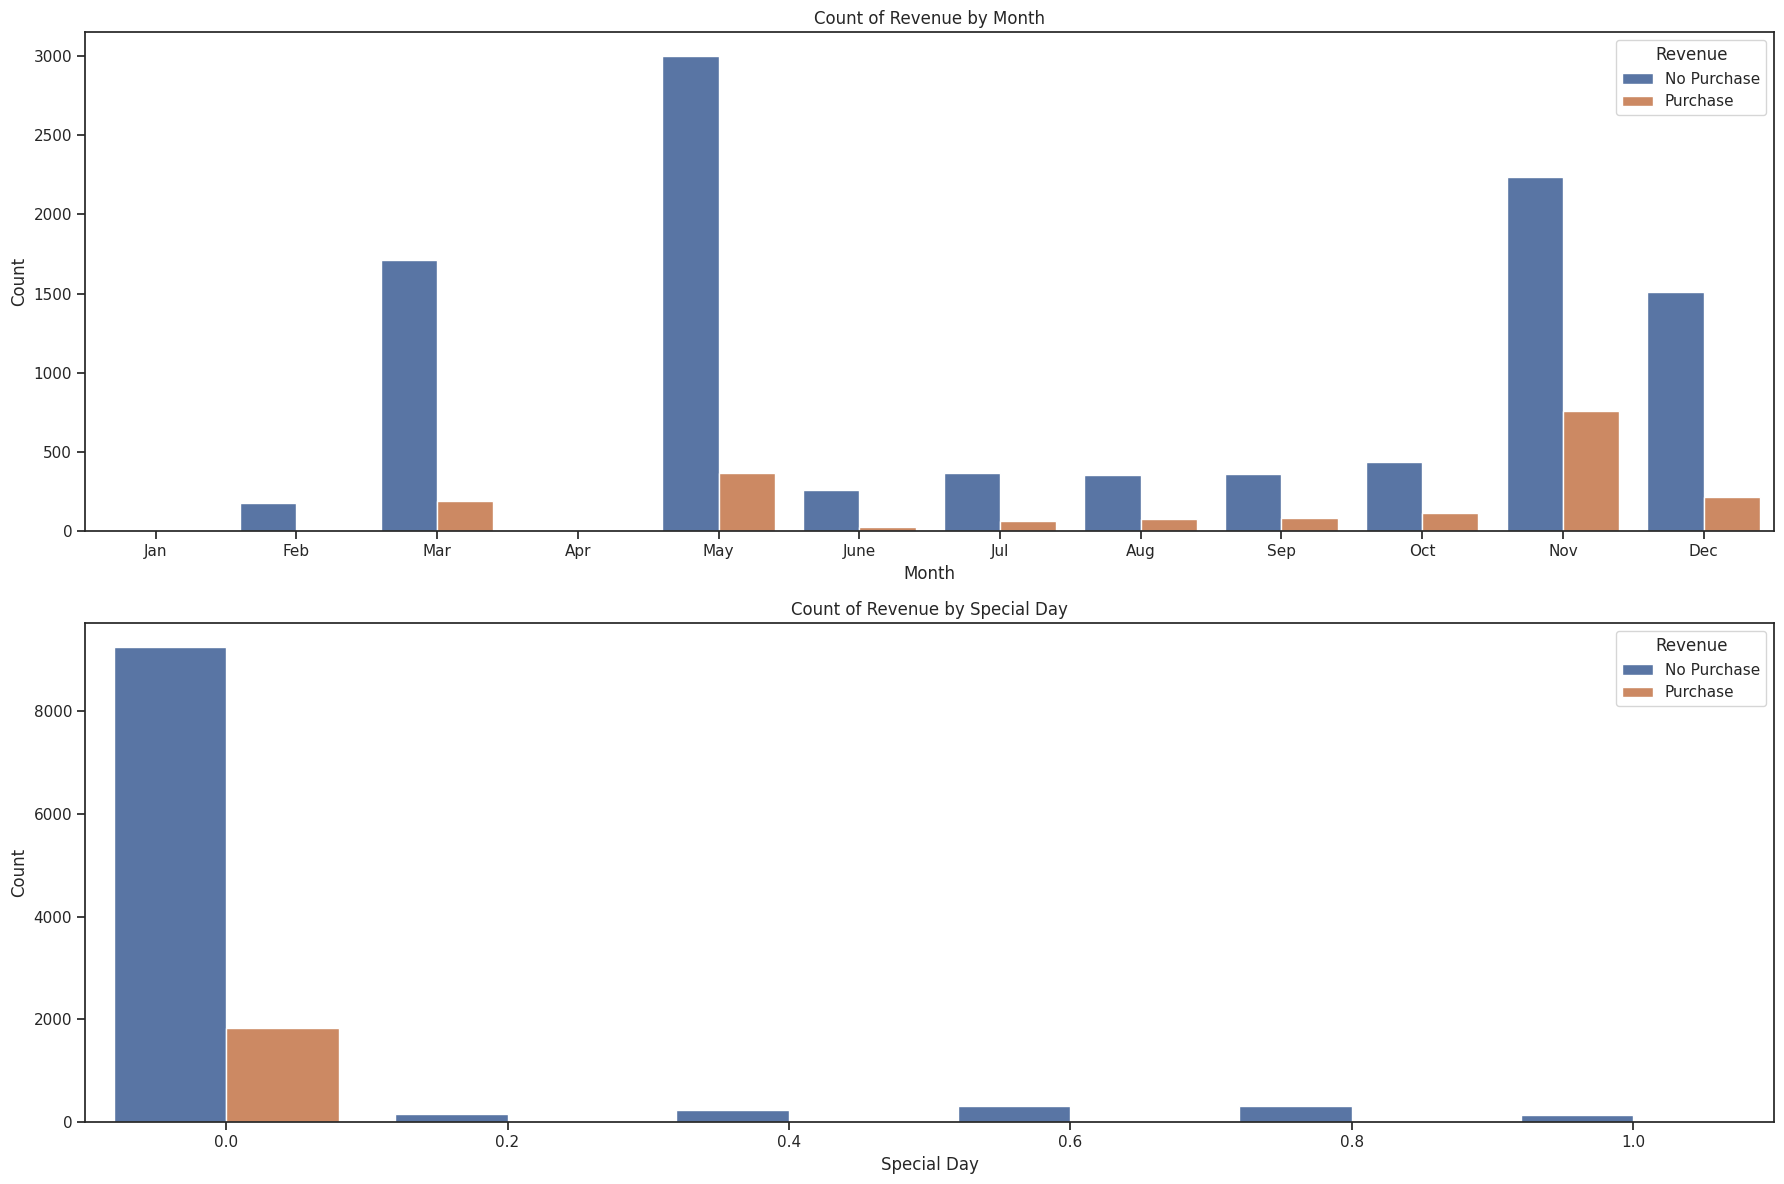

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#Monthly Revenue Sales
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

orderlist = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


revenue_labels = {0: 'No Purchase', 1: 'Purchase'}

sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
ax1.legend(title='Revenue', labels=[revenue_labels[label] for label in df['Revenue'].unique()])

sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)
ax2.legend(title='Revenue', labels=[revenue_labels[label] for label in df['Revenue'].unique()])

ax1.set_title('Count of Revenue by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')

ax2.set_title('Count of Revenue by Special Day')
ax2.set_xlabel('Special Day')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


The first chart (Count of Revenue by Month) shows the number of purchases made in each month. The chart shows that the most purchases are made in November, followed by May, and December. The fewest purchases are made in January and February.

The second chart (Count of Revenue by Special Day) shows the number of purchases made on special days, such as holidays. The chart shows that the most purchases are made on Black Friday, followed by Cyber Monday, Christmas Eve, and Christmas Day. The fewest purchases are made on New Year's Eve and New Year's Day.


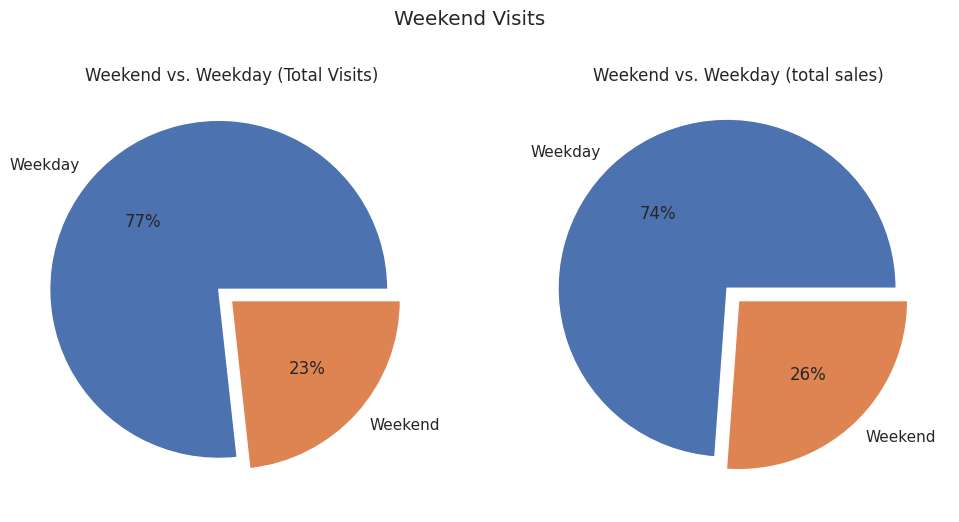

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(aspect="equal"))

total_visits_counts = df['Weekend'].value_counts()
ax[0].pie(total_visits_counts, explode=(0.1, 0), labels=['Weekday', 'Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')

#  visits with transactions
visits_with_transactions_counts = df[df['Revenue'] == 1]['Weekend'].value_counts()
ax[1].pie(visits_with_transactions_counts, explode=(0.1, 0), labels=['Weekday', 'Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (total sales)')

fig.suptitle('Weekend Visits')

plt.show()


The first pie chart shows that 77% of visits occur on weekdays and 23% of visits occur on weekends. This suggests that people are more likely to visit the website during the week than on the weekends

The second pie chart (Fig 6) shows that 74% of visits with transactions occur on weekdays and 26% of visits with transactions occur on weekends. This suggests that people are more likely to purchase something from the website during the week than on the weekends.

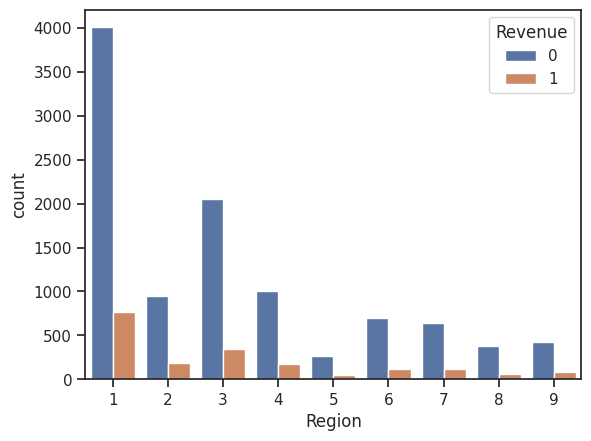

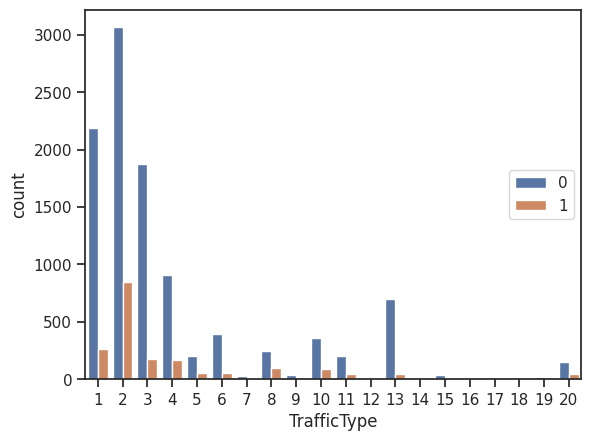

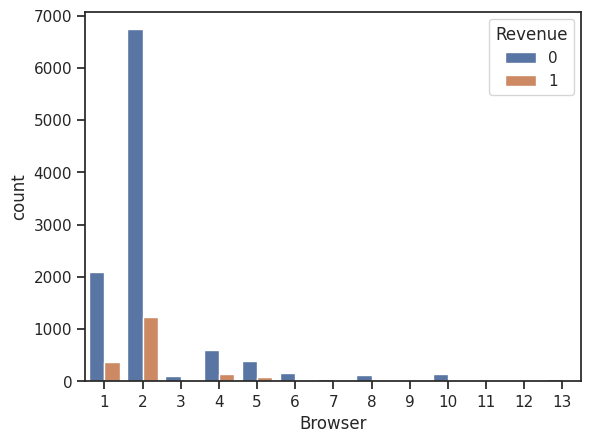

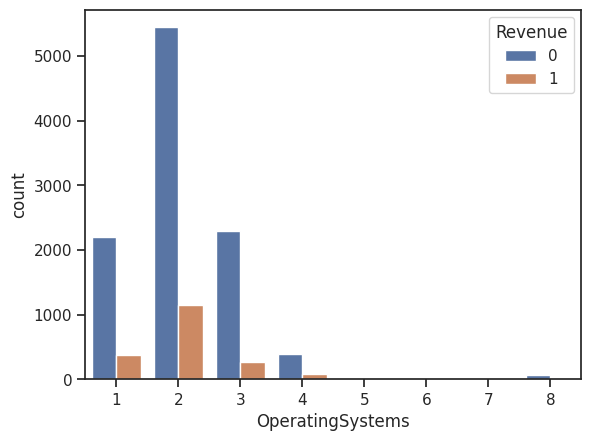

In [17]:
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()

sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc="right")
plt.show()

sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()

sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()

Visitor Analysis

There is Very Regionally Diverse traffic from dataset and Traffic Source is also very diverse with a few sources which didn't contribute much people are more often visiting from one region than any other region and people tend to use 1 dominant browser to access website and one operating system is responsible for more than 5000 examples followed by other Operating Systems.

Positive correlation between the bounce rate and exit rates, when increase in bounce rates the exit rate of the page increases

Negative correlation between page value and bounce rate, When the page value increases the bounce rate decreases

The Positive Correlation between BounceRates(who visits more pages) and Exit Rates(exits without visiting any other pages) Shows that, Visitors who bounce from the website are less likely to generate revenue than the visitors who likely stay more on the website

In [18]:
df = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
df = pd.concat([df,pd.get_dummies(df['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [19]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [23]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix


bnb = BernoulliNB()
bnb.fit(X_train, y_train)

bnb_pred = bnb.predict(X_test)


print('Bernoulli Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, bnb_pred))
print('F1 Score        : ', metrics.f1_score(y_test, bnb_pred))
print('Precision       : ', metrics.precision_score(y_test, bnb_pred))
print('Recall          : ', metrics.recall_score(y_test, bnb_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, bnb_pred))


Bernoulli Naive Bayes Performance:
---------------------------------
Accuracy        :  0.862124898621249
F1 Score        :  0.567062818336163
Precision       :  0.5538971807628524
Recall          :  0.5808695652173913
Confusion Matrix:
  [[2855  269]
 [ 241  334]]


In [25]:
print('Bernoulli Naive Bayes Classificaton Report:')
print('--------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, bnb_pred))
print('Classification Report:\n', classification_report(y_test, bnb_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, bnb_pred))

Bernoulli Naive Bayes Classificaton Report:
--------------------------------------
Accuracy        :  0.862124898621249
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      3124
           1       0.55      0.58      0.57       575

    accuracy                           0.86      3699
   macro avg       0.74      0.75      0.74      3699
weighted avg       0.86      0.86      0.86      3699

Confusion Matrix:
 [[2855  269]
 [ 241  334]]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30, p=2)  # default values
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Model Evaluation
print('K-Nearest Neighbor Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_test, knn_pred))
print('Precision       : ', metrics.precision_score(y_test, knn_pred))
print('Recall          : ', metrics.recall_score(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

K-Nearest Neighbor Performance:
---------------------------------------
Accuracy        :  0.8537442552041092
F1 Score        :  0.3627797408716136
Precision       :  0.5620437956204379
Recall          :  0.2678260869565217
Confusion Matrix:
 [[3004  120]
 [ 421  154]]


In [27]:
print('KNN Classificaton Report:')
print('--------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, knn_pred))
print('Classification Report:\n', classification_report(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

KNN Classificaton Report:
--------------------------------------
Accuracy        :  0.8537442552041092
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      3124
           1       0.56      0.27      0.36       575

    accuracy                           0.85      3699
   macro avg       0.72      0.61      0.64      3699
weighted avg       0.83      0.85      0.83      3699

Confusion Matrix:
 [[3004  120]
 [ 421  154]]


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_reg = LogisticRegression(C=1.0, solver='lbfgs')  # Default parameters

logistic_reg.fit(X_train, y_train)

logistic_pred = logistic_reg.predict(X_test)

# Model Evaluation
print('Logistic Regression Performance:')
print('----------------------------------')
print('Accuracy        : ', accuracy_score(y_test, logistic_pred))
print('F1 Score        : ', f1_score(y_test, logistic_pred))
print('Precision       : ', precision_score(y_test, logistic_pred))
print('Recall          : ', recall_score(y_test, logistic_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, logistic_pred))


Logistic Regression Performance:
----------------------------------
Accuracy        :  0.8832116788321168
F1 Score        :  0.4881516587677725
Precision       :  0.7657992565055762
Recall          :  0.3582608695652174
Confusion Matrix:
  [[3061   63]
 [ 369  206]]


In [29]:
print('Logistic Regression Classificaton Report:')
print('--------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, logistic_pred))
print('Classification Report:\n', classification_report(y_test, logistic_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, logistic_pred))

Logistic Regression Classificaton Report:
--------------------------------------
Accuracy        :  0.8832116788321168
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.77      0.36      0.49       575

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699

Confusion Matrix:
 [[3061   63]
 [ 369  206]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rfm = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                              min_samples_split=2, min_samples_leaf=1,
                               bootstrap=True)


rfm.fit(X_train, y_train)


rfm_pred = rfm.predict(X_test)

# Model Evaluation
print('Random Forest Performance:')
print('----------------------------------')
print('Accuracy        : ', accuracy_score(y_test, rfm_pred))
print('F1 Score        : ', f1_score(y_test, rfm_pred))
print('Precision       : ', precision_score(y_test, rfm_pred))
print('Recall          : ', recall_score(y_test, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, rfm_pred))


Random Forest Performance:
----------------------------------
Accuracy        :  0.9002433090024331
F1 Score        :  0.6328358208955223
Precision       :  0.7395348837209302
Recall          :  0.5530434782608695
Confusion Matrix:
  [[3012  112]
 [ 257  318]]


In [31]:
print('Random Forest Classificaton Repor:')
print('--------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, rfm_pred))
print('Classification Report:\n', classification_report(y_test, rfm_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rfm_pred))

Random Forest Classificaton Repor:
--------------------------------------
Accuracy        :  0.9002433090024331
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.74      0.55      0.63       575

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699

Confusion Matrix:
 [[3012  112]
 [ 257  318]]


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1200, random_state=42)


mlp.fit(X_train_scaled, y_train)


mlp_pred = mlp.predict(X_test_scaled)

# Model Evaluation
print('MLP Classifier Performance:')
print('--------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, mlp_pred))
print('F1 Score        : ', f1_score(y_test, mlp_pred))
print('Precision       : ', precision_score(y_test, mlp_pred))
print('Recall          : ', recall_score(y_test, mlp_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, mlp_pred))

MLP Classifier Performance:
--------------------------------------
Accuracy        :  0.8788861854555285
F1 Score        :  0.5889908256880734
Precision       :  0.6233009708737864
Recall          :  0.5582608695652174
Confusion Matrix:
 [[2930  194]
 [ 254  321]]


In [35]:
#MLP Classification report

print('MLP Classification Report:')
print('--------------------------------------')
print('Accuracy        : ', accuracy_score(y_test, mlp_pred))
print('Classification Report:\n', classification_report(y_test, mlp_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, mlp_pred))

MLP Classification Report:
--------------------------------------
Accuracy        :  0.8788861854555285
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      3124
           1       0.62      0.56      0.59       575

    accuracy                           0.88      3699
   macro avg       0.77      0.75      0.76      3699
weighted avg       0.87      0.88      0.88      3699

Confusion Matrix:
 [[2930  194]
 [ 254  321]]


Overall accuracy indicates 87.89, the precision for class 0 is 92% and class 1 62%, the F1 score is 88% which is a good indicator for model's overall performance

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


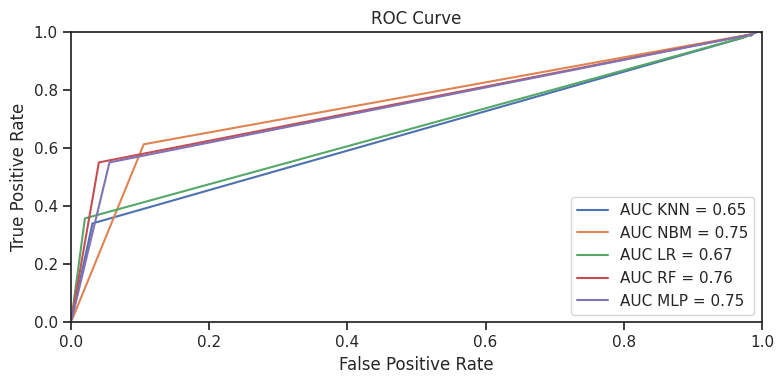

AUC for KNN: 0.65
AUC for NBM: 0.75
AUC for LR: 0.67
AUC for RF: 0.76
AUC for MLP: 0.75


In [34]:

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30, p=2),
    'NBM': BernoulliNB(),
    'LR': LogisticRegression(max_iter=12000),
    'RF': RandomForestClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
}

# AUC for each model
roc_auc_dict = {}

# Plot ROC curves
fig = plt.figure(figsize=(8, 4))
plt.title('ROC Curve')

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_dict[model_name] = roc_auc
    plt.plot(fpr, tpr, label=f'AUC {model_name} = {roc_auc:.2f}')

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

# Display AUC values
for model_name, roc_auc in roc_auc_dict.items():
    print(f'AUC for {model_name}: {roc_auc:.2f}')